In [95]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

# Set defaults for charts so they aren't so tiny!
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10,5]

import numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from pprint import pprint
import math
import pandas as pd
import csv
import sklearn.covariance
import scipy.optimize
import sklearn.linear_model
import scipy.stats

In [96]:
with open('bagged_optimization.csv', 'rt') as file:
    reader = csv.DictReader(file)
    results = list([dict(item) for item in reader])
    
for result in results:
    for key in result:
        try:
            n = float(result[key])
        except Exception as e:
            print(result)
            
results = [{key:float(item) for key,item in result.items()} for result in results]


for result in results:
    result['stdvsmedian'] = result['std'] / result['median']
    result['stdvsmin'] = result['std'] / result['min']
    
nonFeatureKeys=['gamma', 'loss', 'min', 'median', 'max', 'best', 'bestSize', 'predicted']
lossKeys = ['secondaryCutoff_0.0', 
            'secondaryCutoff_0.1',
            'secondaryCutoff_0.2',
            'secondaryCutoff_0.3',
            'secondaryCutoff_0.4',
            'secondaryCutoff_0.5', 
            'secondaryCutoff_0.6',
            'secondaryCutoff_0.7',
            'secondaryCutoff_0.8',
            'secondaryCutoff_0.9',
            'secondaryCutoff_1.0']

for result in results:
    best = min(lossKeys, key=lambda key: result[key])
    result['best'] = best
    result['bestSize'] = float(best[len('secondaryCutoff_'):])

    
pd.DataFrame(results)

,best,best/median,bestSize,contributions_exponential,contributions_linear,contributions_logarithmic,contributions_peakvalley,contributions_random,interactions,interactions_index,...,secondaryCutoff_0.5,secondaryCutoff_0.6,secondaryCutoff_0.7,secondaryCutoff_0.8,secondaryCutoff_0.9,secondaryCutoff_1.0,skew,std,stdvsmedian,stdvsmin
0,secondaryCutoff_1.0,0.821238,1.0,0.285714,0.357143,0.000000,0.214286,0.142857,46.0,0.782313,...,0.219874,0.218455,0.214664,0.224157,0.215587,0.211079,1.383712,0.050903,0.197723,0.241158
1,secondaryCutoff_0.7,0.833425,0.7,0.000000,0.166667,0.000000,0.333333,0.500000,10.0,0.925926,...,0.144588,0.147871,0.144126,0.149282,0.145232,0.145024,1.865890,0.037999,0.218039,0.262017
2,secondaryCutoff_0.9,0.861475,0.9,0.214286,0.142857,0.285714,0.214286,0.142857,55.0,0.935374,...,0.245002,0.250699,0.248803,0.245913,0.244557,0.244691,1.590205,0.041106,0.144759,0.167991
3,secondaryCutoff_1.0,0.858909,1.0,0.285714,0.214286,0.285714,0.071429,0.142857,51.0,0.867347,...,0.257291,0.254022,0.258010,0.257826,0.251558,0.249351,1.605304,0.047523,0.163637,0.190588
4,secondaryCutoff_0.6,0.849063,0.6,0.000000,0.272727,0.272727,0.090909,0.363636,26.0,0.716253,...,0.221467,0.215725,0.220101,0.217225,0.218124,0.217171,1.887775,0.059762,0.233216,0.275182
5,secondaryCutoff_1.0,0.815548,1.0,0.300000,0.300000,0.300000,0.100000,0.000000,29.0,0.966667,...,0.217060,0.208631,0.211253,0.209070,0.206856,0.203459,1.643072,0.064107,0.256690,0.315084
6,secondaryCutoff_0.9,0.878141,0.9,0.250000,0.375000,0.000000,0.000000,0.375000,14.0,0.729167,...,0.368788,0.373133,0.369042,0.364117,0.354219,0.363837,1.491221,0.053835,0.130007,0.147965
7,secondaryCutoff_0.6,0.811445,0.6,0.250000,0.250000,0.125000,0.125000,0.250000,18.0,0.937500,...,0.194045,0.185917,0.198771,0.190770,0.195750,0.194942,1.678604,0.052748,0.219597,0.270585
8,secondaryCutoff_0.6,0.834690,0.6,0.142857,0.000000,0.285714,0.285714,0.285714,63.0,1.071429,...,0.249997,0.239232,0.245971,0.241771,0.248103,0.245806,1.340597,0.046159,0.156866,0.187787
9,secondaryCutoff_0.8,0.664069,0.8,0.375000,0.125000,0.250000,0.125000,0.125000,12.0,0.625000,...,0.127536,0.120500,0.120088,0.111567,0.115712,0.118192,1.712961,0.087141,0.489788,0.737282


<IPython.core.display.Javascript object>


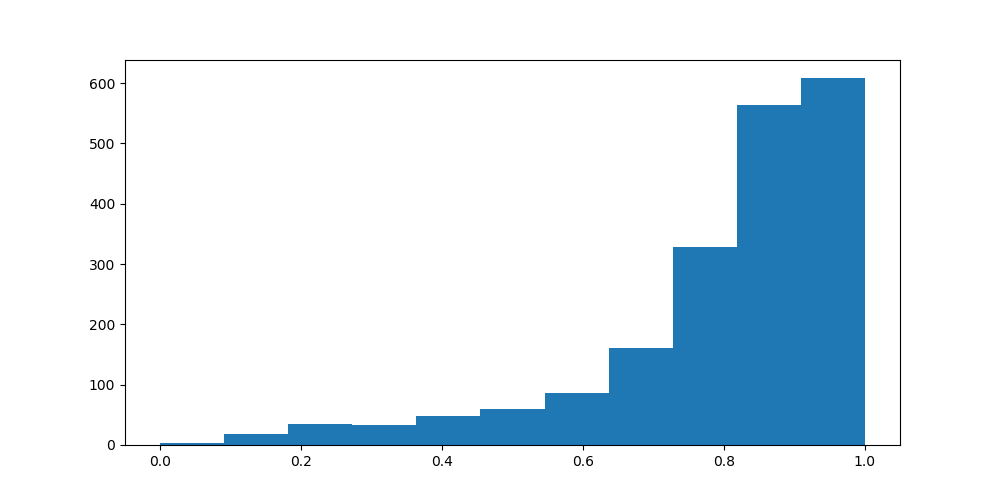

In [97]:
sizes = [result['bestSize'] for result in results]

averageSize = numpy.max(sizes)

ax, fig = plt.subplots()

fig.hist(sizes, bins=11)

fig


In [98]:
counts = {}
for key in lossKeys:
    counts[key]=0
for result in results:
    counts[result['best']] += 1


pprint(counts)

{'secondaryCutoff_0.0': 4,
 'secondaryCutoff_0.1': 19,
 'secondaryCutoff_0.2': 35,
 'secondaryCutoff_0.3': 33,
 'secondaryCutoff_0.4': 48,
 'secondaryCutoff_0.5': 60,
 'secondaryCutoff_0.6': 87,
 'secondaryCutoff_0.7': 161,
 'secondaryCutoff_0.8': 328,
 'secondaryCutoff_0.9': 564,
 'secondaryCutoff_1.0': 608}


<IPython.core.display.Javascript object>


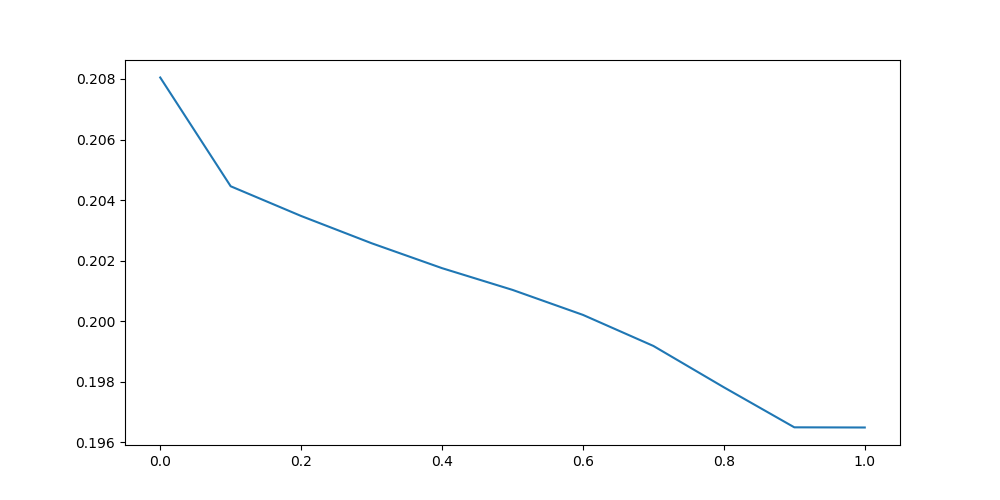

In [99]:
averageLoss = {}

for key in lossKeys:
    length = float(key[len('secondaryCutoff_'):])
    averageLoss[length] = numpy.mean([result[key] for result in results])


averageLoss
ax, fig = plt.subplots()
fig.plot(averageLoss.keys(), averageLoss.values())
fig

In [100]:
labels = [key for key in results[0].keys() if key not in nonFeatureKeys and key not in lossKeys]

bestSizes = [result['bestSize'] for result in results]

correlations = []
for label in labels:
    vector = [result[label] for result in results]
    correlation = scipy.stats.spearmanr(vector, bestSizes)[0]
    correlations.append({'name': label, 'correlation': correlation})

    
with open('correls.csv', 'wt') as file:
    writer = csv.DictWriter(file, fieldnames=['name','correlation'])
    writer.writeheader()
    writer.writerows(correlations)


correlations = list(sorted(correlations, key=lambda r:-abs(r['correlation'])))
pd.DataFrame(correlations)

,correlation,name
0,0.378251,num_parameters
1,0.370489,log10_cardinality
2,0.368149,interactions
3,-0.260092,stdvsmedian
4,-0.249719,stdvsmin
5,-0.207014,std
6,-0.200028,skew
7,-0.185961,kurtosis
8,0.113590,best/median
9,0.093327,interactions_index


In [101]:
def plot(variable, rounding, lim=None):
    pairs = [(float(round(result[variable]*(1/rounding))/(1/rounding)), float(result['bestSize'])) for result in results]
    pairs = sorted(pairs, key=lambda r:r[0])
    bestSizes = [p[1] for p in pairs]
    values = [p[0] for p in pairs]
    
    means = []
    meanValues = []
    allValues = set(values)
    for v in sorted(allValues):
        valueBestSizes = [bestSizes[i] for i in range(len(bestSizes)) if '{:.3E}'.format(values[i]) == '{:.3E}'.format(v)]
        meanValues.append(v)
        means.append(numpy.mean(valueBestSizes))
    
    ax, fig = plt.subplots()
    fig.set_xlabel(variable)
    fig.set_ylabel('secondaryCutoff')
    fig.set_xticks(numpy.linspace(numpy.min(values),numpy.max(values),10))
    fig.set_yticks(numpy.linspace(0,1,10))
    fig.set_ylim(0, 1.1)
    if lim:
        fig.set_xlim(0, lim)
    fig.xaxis.set_minor_formatter(mticker.ScalarFormatter())
    fig.xaxis.set_major_formatter(mticker.ScalarFormatter())
    fig.yaxis.set_minor_formatter(mticker.ScalarFormatter())
    fig.yaxis.set_major_formatter(mticker.ScalarFormatter())
    fig.scatter(values, bestSizes)
    fig.plot(meanValues, means, 'r')
    return fig

<IPython.core.display.Javascript object>


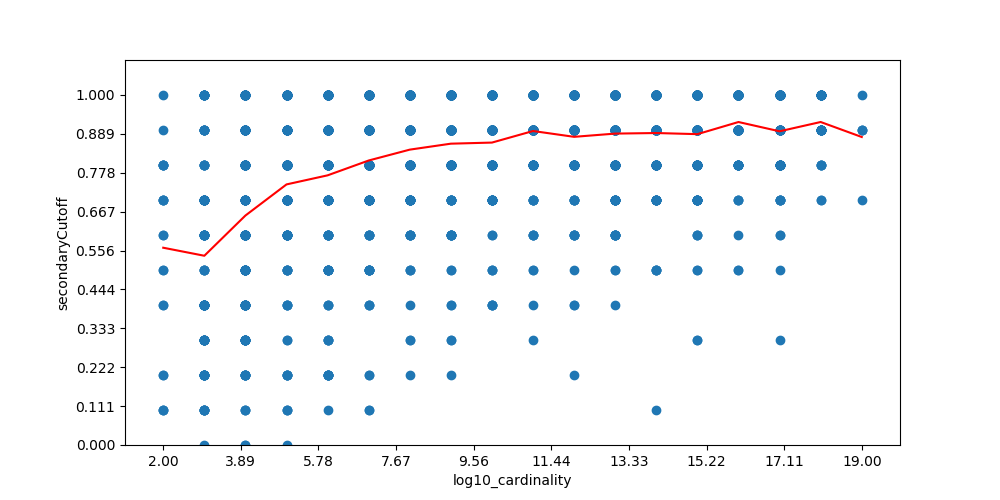

In [102]:
plot('log10_cardinality', 1)

<IPython.core.display.Javascript object>


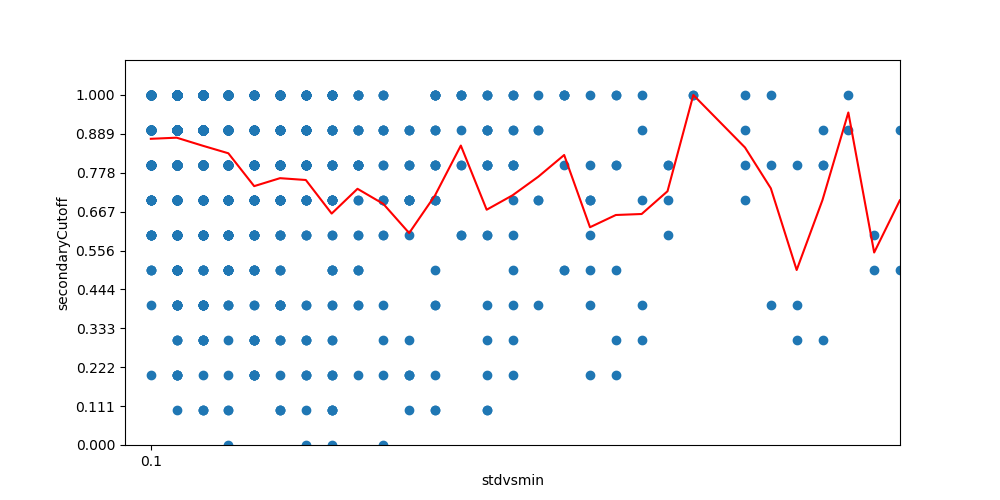

In [103]:
plot('stdvsmin', 0.1, 3)

<IPython.core.display.Javascript object>


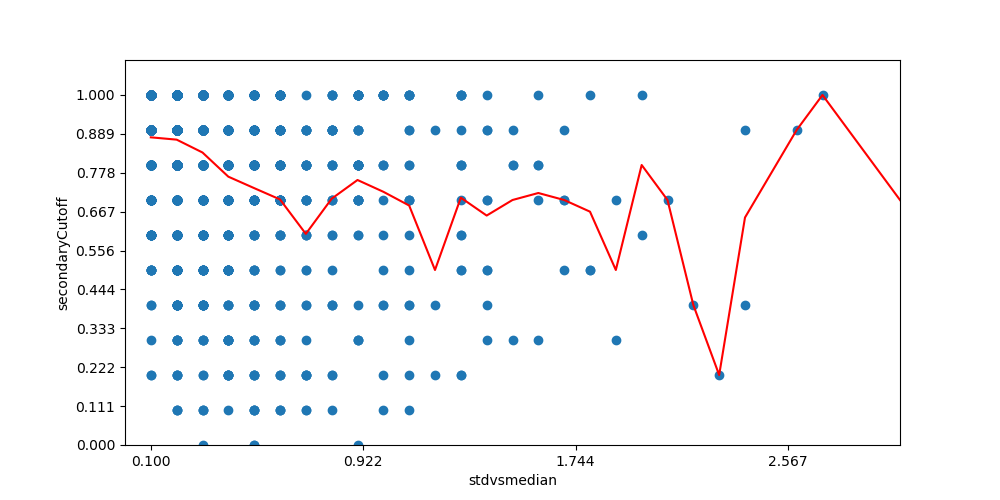

In [104]:
plot('stdvsmedian', 0.1, 3)

<IPython.core.display.Javascript object>


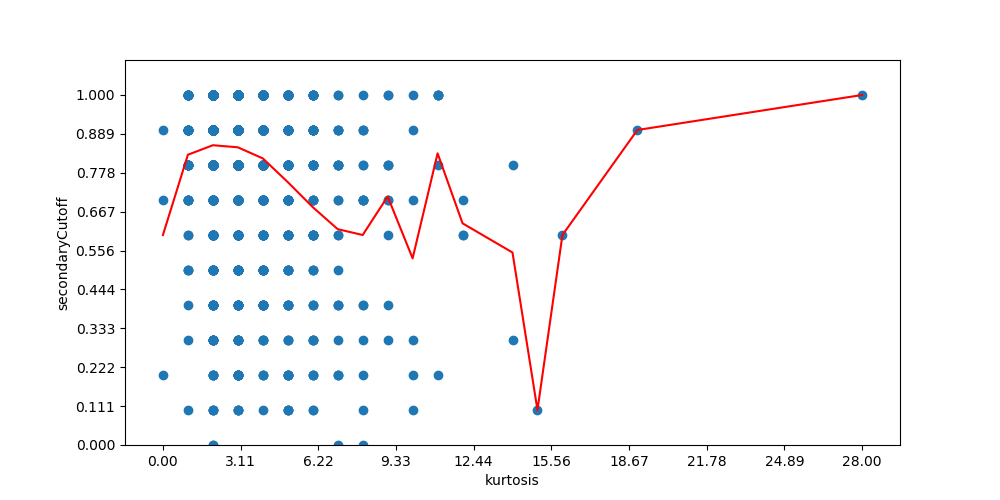

In [105]:
plot('kurtosis', 1)

<IPython.core.display.Javascript object>


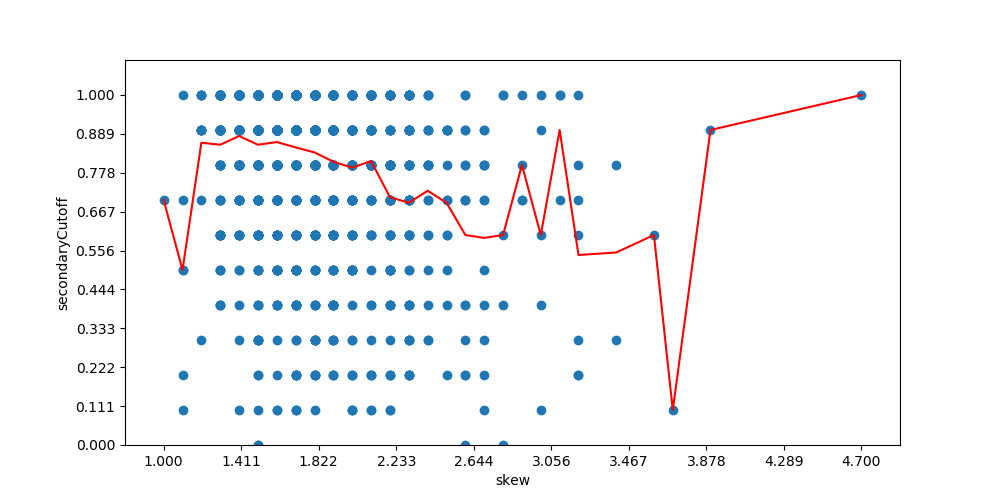

In [106]:
plot('skew', 0.1)

In [107]:
fields = sorted(results[0].keys())
fields = [field for field in fields if 'contributions' not in field and 'interactions' not in field and field not in lossKeys and field not in nonFeatureKeys]

vectors = [[float(result[f]) for f in fields] for result in filteredResults]
n_EI_candidates = [result['bestSize'] for result in filteredResults]
deviations = numpy.std(vectors, axis=0)
covarianceModel = sklearn.covariance.LedoitWolf()
covarianceModel.fit(numpy.array(vectors), numpy.array(n_EI_candidates))
deviations = numpy.std(vectors, axis=0)

rows = []
for i,l in enumerate(fields):
    data = {fields[k]:round(100*(covarianceModel.covariance_[i][k] / (deviations[i] * deviations[k]))) if k!= i else '' for k in range(len(fields))}
    data ['field'] = fields[i]
    rows.append(data)
pd.DataFrame(rows)

,best/median,field,kurtosis,log10_cardinality,num_parameters,range,skew,std,stdvsmedian,stdvsmin
0,,best/median,-8,50,52,40,-9,-61,-77,-76
1,-8,kurtosis,,-45,-46,-10,95,27,38,29
2,50,log10_cardinality,-45,,98,11,-51,-68,-62,-50
3,52,num_parameters,-46,98,,12,-52,-71,-65,-52
4,40,range,-10,11,12,,-6,21,-23,-21
5,-9,skew,95,-51,-52,-6,,40,46,36
6,-61,std,27,-68,-71,21,40,,77,65
7,-77,stdvsmedian,38,-62,-65,-23,46,77,,94
8,-76,stdvsmin,29,-50,-52,-21,36,65,94,


In [108]:
predictors = ['stdvsmedian', 'log10_cardinality']

vectors = [[result[predictor] for predictor in predictors] for result in filteredResults]
gammas = [result['bestSize'] for result in filteredResults]


model = sklearn.linear_model.Ridge(alpha = .5)
model.fit(vectors, gammas)


weights = {predictors[i]: model.coef_[i] for i in range(len(predictors))}
weights['intercept'] = model.intercept_
pd.DataFrame([weights])

,intercept,log10_cardinality,stdvsmedian
0,0.654611,0.018004,-0.068551


In [109]:
def roundPrecision(number, precision=3):
    """ Rounds the given floating point number to a certain precision, for output."""
    return float(('{:.' + str(precision) + 'E}').format(number))


equation = "Cutoff = " + str(roundPrecision(weights['intercept'], 1))
for predictor in predictors:
    equation += " + " + str(predictor) + " * " + str(roundPrecision(weights[predictor], 1))
print(equation)

Cutoff = 0.65 + stdvsmedian * -0.069 + log10_cardinality * 0.018
